In [1]:
cd ..

c:\Users\jeong\Desktop\python\action-recognition-practice


In [2]:
import numpy as np
import processing.nia2019v1 as nia
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

In [3]:
root_path = "./data/raw"
output_path = "./data/processed"

In [4]:
metadata_list = nia.get_all_metadata(root_path)
actions = [act for meta in metadata_list for obj in meta.objects for act in obj.actions]

In [5]:
def visualize_actions(actions):
    names = nia.get_action_names_from_action_list(actions)
    cnt = { name: 0 for name in names }
    
    for action in actions:
        cnt[action.name] += 1

    cnt = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
    
    x = list(map(lambda x: x[0], cnt))
    height = list(map(lambda x: x[1], cnt))

    print("# number of clips by action:")
    for item in cnt:
        print(f"{item[0]}: {item[1]}")

    plt.title("number of clips by action")
    plt.bar(x, height)
    plt.show()

# number of clips by action:
totter: 2480
stop and go: 731
pulling: 691
threaten: 551
falldown: 480
touching: 363
pushing: 249
drop: 247
sitdown: 229
carring: 214
punching: 95
stealing: 47
around: 39
hugging: 24
running: 24
throwing: 6
standing: 1


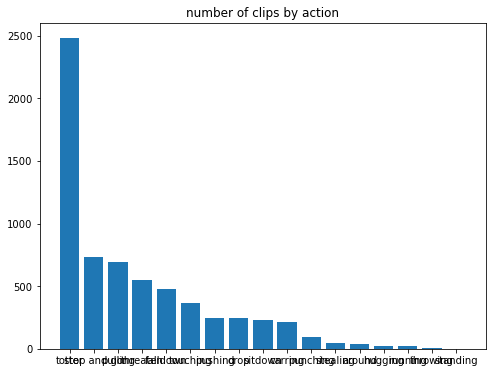

In [6]:
visualize_actions(actions)

# number of clips by action:
totter: 70
pulling: 41
falldown: 41
drop: 24
touching: 23
sitdown: 7
pushing: 5
punching: 4
threaten: 4
carring: 3
stealing: 1


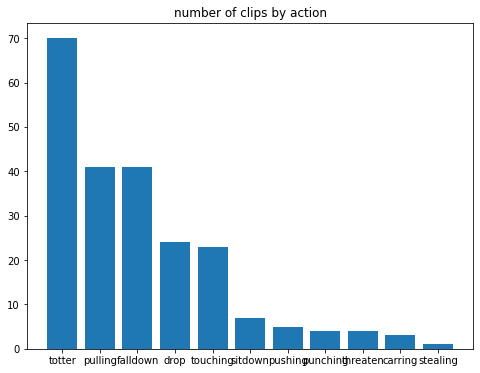

In [13]:
# 원하는 프레임 수에 맞는 길이의 액션만 추출
import math
fps = 3
frames = 9
duration = math.ceil(frames / fps)

actions_filtered = [a for a in actions if a.duration <= duration + (1/fps) and a.duration > duration]
visualize_actions(actions_filtered)

# number of clips by action:
totter: 70
falldown: 41
pulling: 41


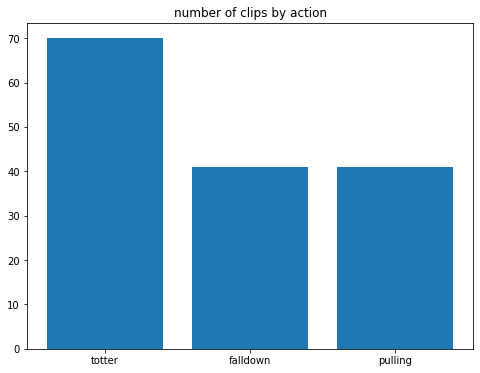

In [14]:
action_names_selected = ["falldown", "pulling", "totter"]
actions_filtered = [a for a in actions_filtered if a.name in action_names_selected]
visualize_actions(actions_filtered)

In [15]:
from tqdm import tqdm
samples = []
for action in tqdm(actions_filtered):
    clip = nia.create_clip_from_action(action, fps=fps)
    samples.append((action.name, clip))

100%|██████████| 152/152 [01:21<00:00,  1.87it/s]


In [26]:
clips = np.array([sample[1][:,0:9,:,:] for sample in samples])
targets = [sample[0] for sample in samples]

In [28]:
clips.shape

(152, 3, 9, 480, 768)

In [33]:
np.savez_compressed(os.path.join(output_path, "falldown pulling totter"), clips=clips, targets=targets)

In [29]:
np.array(targets)

array(['falldown', 'falldown', 'falldown', 'falldown', 'falldown',
       'falldown', 'falldown', 'pulling', 'falldown', 'falldown',
       'falldown', 'falldown', 'falldown', 'pulling', 'pulling',
       'pulling', 'pulling', 'pulling', 'falldown', 'pulling', 'falldown',
       'pulling', 'falldown', 'pulling', 'pulling', 'pulling', 'falldown',
       'falldown', 'falldown', 'falldown', 'falldown', 'pulling',
       'pulling', 'pulling', 'falldown', 'falldown', 'falldown',
       'falldown', 'falldown', 'falldown', 'falldown', 'falldown',
       'falldown', 'falldown', 'falldown', 'falldown', 'falldown',
       'falldown', 'falldown', 'falldown', 'falldown', 'falldown',
       'falldown', 'falldown', 'falldown', 'pulling', 'pulling',
       'pulling', 'pulling', 'pulling', 'pulling', 'pulling', 'pulling',
       'pulling', 'pulling', 'pulling', 'pulling', 'pulling', 'pulling',
       'pulling', 'pulling', 'pulling', 'pulling', 'pulling', 'pulling',
       'pulling', 'pulling', 'pullin

In [4]:
loaded = np.load(os.path.join(output_path, "falldown pulling totter.npz"))